In [1]:
# Word Cloud Visualization for Placement Dataset
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import nltk

# ---- Step 1: Download NLTK resources ----
nltk.download('punkt')
nltk.download('stopwords')

# ---- Step 2: Load the dataset ----
df = pd.read_csv("/content/Placement_Data_Full_Class.csv")

# ---- Step 3: Combine relevant text columns ----
# We'll use columns with meaningful text: specialisation, status, gender, workex
text_data = " ".join(
    df["specialisation"].astype(str) + " " +
    df["status"].astype(str) + " " +
    df["gender"].astype(str) + " " +
    df["workex"].astype(str)
)

# ---- Step 4: Preprocess text ----
tokens = word_tokenize(text_data.lower())
filtered = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]

# ---- Step 5: Create WordCloud ----
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered))

# ---- Step 6: Plot ----
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud Visualization of Placement Dataset", fontsize=16)
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


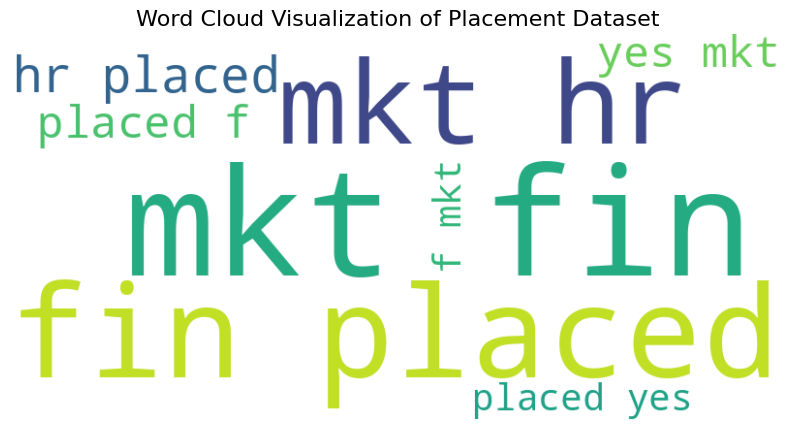

In [2]:
# Word Cloud Visualization for Placement Dataset
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import nltk

# ---- Step 1: Download NLTK resources ----
nltk.download('punkt')
nltk.download('punkt_tab')   # <-- Add this line to fix LookupError
nltk.download('stopwords')

# ---- Step 2: Load the dataset ----
df = pd.read_csv("Placement_Data_Full_Class.csv")

# ---- Step 3: Combine relevant text columns ----
# We'll use columns with meaningful text: specialisation, status, gender, workex
text_data = " ".join(
    df["specialisation"].astype(str) + " " +
    df["status"].astype(str) + " " +
    df["gender"].astype(str) + " " +
    df["workex"].astype(str)
)

# ---- Step 4: Preprocess text ----
tokens = word_tokenize(text_data.lower())
filtered = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]

# ---- Step 5: Create WordCloud ----
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered))

# ---- Step 6: Plot ----
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud Visualization of Placement Dataset", fontsize=16)
plt.show()



Top 10 common words:
           word  count
3        class    467
15       loved    319
27        yoga    171
2      calming    171
12  instructor    159
17  motivating    159
11       great    159
16     morning    155
6        early    155
8    enjoyable    150


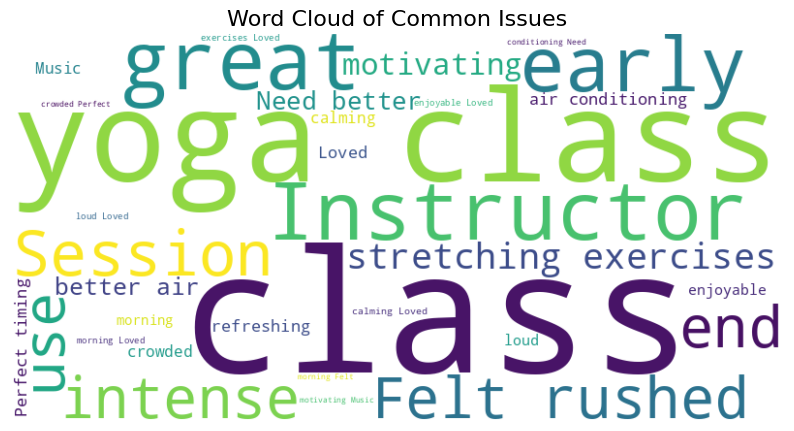

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("/content/fitness_class_2212.csv")

# --- Create a simulated feedback column ---
import random
sample_feedback = [
    "Loved the class but too crowded",
    "Instructor was great and motivating",
    "Music was too loud",
    "Perfect timing, very refreshing",
    "Could use more stretching exercises",
    "Session was intense but enjoyable",
    "Too early in the morning",
    "Need better air conditioning",
    "Loved the yoga class, very calming",
    "Felt rushed at the end of the class"
]

df["feedback"] = [random.choice(sample_feedback) for _ in range(len(df))]

# --- Vectorize feedback ---
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df["feedback"])

word_freq = pd.DataFrame({
    'word': vectorizer.get_feature_names_out(),
    'count': X.toarray().sum(axis=0)
}).sort_values(by='count', ascending=False)

print("\nTop 10 common words:\n", word_freq.head(10))

# --- Generate Word Cloud ---
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df["feedback"]))
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Common Issues', fontsize=16)
plt.show()
